In [84]:
#Laplace Eqn Solver SOR

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.linalg import solve_banded
import time


Iteration: 0, Residual: 0.54360190
Iteration: 200, Residual: 0.00051750
Iteration: 400, Residual: 0.00002656
Iteration: 600, Residual: 0.00000139

Convergence reached after 624 iterations.
Elapsed time (imports -> pre-plot): 0.054 s


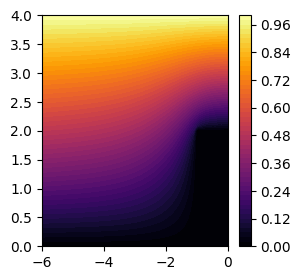

"\nplt.figure(figsize=(10,10))\nplt.pcolormesh(X, Y, psiArray, cmap='viridis')\nplt.colorbar()\nplt.show()\n"

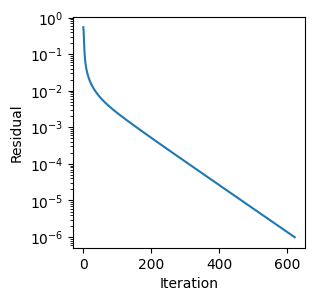

In [85]:

tStart = time.perf_counter()

def generatedomain(x0, xN, nx, y0, yN, ny):
    x = np.linspace(x0, xN, nx)
    y = np.linspace(y0, yN, ny)
    X, Y = np.meshgrid(x, y)
    return X, Y

def applyDirichletBoundaryConditions(psi, X, Y):
   psi[:,0] = Y[:,0]/4
   psi[-1:,:] = 1
   psi[0,:] = 0
   psi[0:21, 50:61] = 0
   return psi



def solverSOR(psiArray, omegaSOR, convergenceTolerance, numIterations):
    residuals = []
    counter = []
    for i in range(numIterations):
        psiInitial = psiArray.copy()

        #psiArray[1:-1, 1:-1] = ((1 - omegaSOR) * psiInitial[1:-1, 1:-1]) + (omegaSOR * (psiInitial[2:, 1:-1] + psiInitial[:-2, 1:-1] + psiInitial[1:-1, 2:] + psiInitial[1:-1, :-2]) / 4)

        #white
        psiArray[1:-1:2, 1:-1:2] = (1 - omegaSOR) * psiInitial[1:-1:2, 1:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[1:-1:2, 2::2] + psiArray[1:-1:2, :-2:2] +
                                               psiArray[2::2, 1:-1:2] + psiArray[:-2:2, 1:-1:2])
        
        psiArray[2:-1:2, 2:-1:2] = (1 - omegaSOR) * psiInitial[2:-1:2, 2:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[2:-1:2, 3::2] + psiArray[2:-1:2, 1:-2:2] +
                                               psiArray[3::2, 2:-1:2] + psiArray[1:-2:2, 2:-1:2])

        #black
        psiArray[1:-1:2, 2:-1:2] = (1 - omegaSOR) * psiInitial[1:-1:2, 2:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[1:-1:2, 3::2] + psiArray[1:-1:2, 1:-2:2] +
                                               psiArray[2::2, 2:-1:2] + psiArray[:-2:2, 2:-1:2])
                                               
        psiArray[2:-1:2, 1:-1:2] = (1 - omegaSOR) * psiInitial[2:-1:2, 1:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[2:-1:2, 2::2] + psiArray[2:-1:2, :-2:2] +
                                               psiArray[3::2, 1:-1:2] + psiArray[1:-2:2, 1:-1:2])
        
        psiArray[0:21, 50:61] = 0
        psiArray[21:-1, -1] = psiArray[21:-1, -2]

        residual = np.sqrt(np.sum((psiArray - psiInitial)**2))/np.sqrt(np.sum((psiInitial)**2))
        residuals.append(residual)
        counter.append(i)

        if i % 200 == 0:
            print(f"Iteration: {i}, Residual: {residual:.8f}")

        if residual < convergenceTolerance:
            print(f"\nConvergence reached after {i + 1} iterations.")
            break

    return psiArray, residuals, counter


#Main Code

x0, xN, nx =  -6, 0, 61
y0, yN, ny = 0, 4, 41
X, Y = generatedomain(x0, xN, nx, y0, yN, ny)

#make an array of zeros for the potential flow solution
psiArray = np.zeros_like(X)
psiArray = applyDirichletBoundaryConditions(psiArray, X, Y)

omegaSOR = 1.5
convergenceTolerance = 1e-6
numIterations = 30000

psiArrayNew, residuals, iterations = solverSOR(psiArray, omegaSOR, convergenceTolerance, numIterations)


tElapsed = time.perf_counter() - tStart
print(f"Elapsed time (imports -> pre-plot): {tElapsed:.3f} s")



figureSizes = (3,3)

plt.figure(figsize=figureSizes)
plt.contourf(X, Y, psiArrayNew, levels = 50, cmap='inferno')
plt.colorbar()
plt.show()

plt.figure(figsize=figureSizes)
plt.semilogy(iterations, residuals)
plt.xlabel("Iteration")
plt.ylabel("Residual")



'''
plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, psiArray, cmap='viridis')
plt.colorbar()
plt.show()
'''




Iteration: 0, Residual: 0.62999025
Iteration: 200, Residual: 0.00056381
Iteration: 400, Residual: 0.00002849
Iteration: 600, Residual: 0.00000146

Convergence reached after 627 iterations.
Elapsed time (imports -> pre-plot): 1.105 s


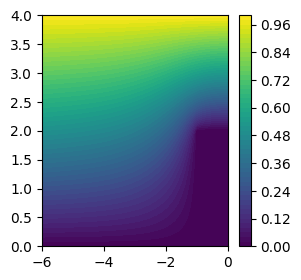

"\nplt.figure(figsize=(10,10))\nplt.pcolormesh(X, Y, psiArray, cmap='viridis')\nplt.colorbar()\nplt.show()\n"

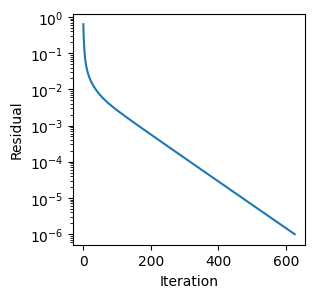

In [86]:
tStart = time.perf_counter()

def generatedomain(x0, xN, nx, y0, yN, ny):
    x = np.linspace(x0, xN, nx)
    y = np.linspace(y0, yN, ny)
    X, Y = np.meshgrid(x, y)
    return X, Y

def applyDirichletBoundaryConditions(psi, X, Y):
   psi[:,0] = Y[:,0]/4
   psi[-1:,:] = 1
   psi[0,:] = 0
   psi[0:21, 50:61] = 0
   return psi



def solverSOR(psiArray, omegaSOR, convergenceTolerance, numIterations):
    ny, nx = psiArray.shape
    residuals = []
    counter = []

    for i in range(numIterations):
        psiInitial = psiArray.copy()

        for j in range(1, ny - 1):
            for k in range(1, nx - 1):

                ifWithinDomain = (j < 21) and (k > 49)
                if ifWithinDomain:
                    continue

                psi0 = 0.25 * (psiArray[j, k+1] + psiArray[j, k-1] +
                                 psiArray[j+1, k] + psiArray[j-1, k])

                psiArray[j, k] = (1 - omegaSOR) * psiInitial[j, k] + omegaSOR * psi0
        for j in range(21, ny - 1):
            psiArray[j, -1] = psiArray[j, -2]

        residual = np.sqrt(np.sum((psiArray - psiInitial)**2)) / np.sqrt(np.sum(psiInitial**2))
        residuals.append(residual)
        counter.append(i)

        if i % 200 == 0:
            print(f"Iteration: {i}, Residual: {residual:.8f}")

        if residual < convergenceTolerance:
            print(f"\nConvergence reached after {i + 1} iterations.")
            break

    return psiArray, residuals, counter


#Main Code

x0, xN, nx =  -6, 0, 61
y0, yN, ny = 0, 4, 41
X, Y = generatedomain(x0, xN, nx, y0, yN, ny)

#make an array of zeros for the potential flow solution
psiArray = np.zeros_like(X)
psiArray = applyDirichletBoundaryConditions(psiArray, X, Y)

omegaSOR = 1.5
convergenceTolerance = 1e-6
numIterations = 10000

psiArrayNew, residuals, iterations = solverSOR(psiArray, omegaSOR, convergenceTolerance, numIterations)


tElapsed = time.perf_counter() - tStart
print(f"Elapsed time (imports -> pre-plot): {tElapsed:.3f} s")



figureSizes = (3,3)

plt.figure(figsize=figureSizes)
plt.contourf(X, Y, psiArrayNew, levels = 50, cmap='viridis')
plt.colorbar()
plt.show()

plt.figure(figsize=figureSizes)
plt.semilogy(iterations, residuals)
plt.xlabel("Iteration")
plt.ylabel("Residual")



'''
plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, psiArray, cmap='viridis')
plt.colorbar()
plt.show()
'''




In [87]:
#Using CuPy

import cupy as np

tStart = time.perf_counter()

def generatedomain(x0, xN, nx, y0, yN, ny):
    x = np.linspace(x0, xN, nx)
    y = np.linspace(y0, yN, ny)
    X, Y = np.meshgrid(x, y)
    return X, Y

def applyDirichletBoundaryConditions(psi, X, Y):
   psi[:,0] = Y[:,0]/4
   psi[-1:,:] = 1
   psi[0,:] = 0
   psi[0:2001, 5000:6001] = 0
   return psi



def solverSOR(psiArray, omegaSOR, convergenceTolerance, numIterations):
    residuals = []
    counter = []
    for i in range(numIterations):
        psiInitial = psiArray.copy()

        #psiArray[1:-1, 1:-1] = ((1 - omegaSOR) * psiInitial[1:-1, 1:-1]) + (omegaSOR * (psiInitial[2:, 1:-1] + psiInitial[:-2, 1:-1] + psiInitial[1:-1, 2:] + psiInitial[1:-1, :-2]) / 4)

        #white
        psiArray[1:-1:2, 1:-1:2] = (1 - omegaSOR) * psiInitial[1:-1:2, 1:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[1:-1:2, 2::2] + psiArray[1:-1:2, :-2:2] +
                                               psiArray[2::2, 1:-1:2] + psiArray[:-2:2, 1:-1:2])

        psiArray[2:-1:2, 2:-1:2] = (1 - omegaSOR) * psiInitial[2:-1:2, 2:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[2:-1:2, 3::2] + psiArray[2:-1:2, 1:-2:2] +
                                               psiArray[3::2, 2:-1:2] + psiArray[1:-2:2, 2:-1:2])

        #black
        psiArray[1:-1:2, 2:-1:2] = (1 - omegaSOR) * psiInitial[1:-1:2, 2:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[1:-1:2, 3::2] + psiArray[1:-1:2, 1:-2:2] +
                                               psiArray[2::2, 2:-1:2] + psiArray[:-2:2, 2:-1:2])

        psiArray[2:-1:2, 1:-1:2] = (1 - omegaSOR) * psiInitial[2:-1:2, 1:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[2:-1:2, 2::2] + psiArray[2:-1:2, :-2:2] +
                                               psiArray[3::2, 1:-1:2] + psiArray[1:-2:2, 1:-1:2])

        psiArray[0:2001, 5000:6001] = 0
        psiArray[2001:-1, -1] = psiArray[2001:-1, -2]

        residual = np.sqrt(np.sum((psiArray - psiInitial)**2))/np.sqrt(np.sum((psiInitial)**2))
        residuals.append(residual)
        counter.append(i)

        if i % 200 == 0:
            print(f"Iteration: {i}, Residual: {residual:.8f}, Time elapsed: {time.perf_counter() - tStart:.3f} s")

        if residual < convergenceTolerance:
            print(f"\nConvergence reached after {i + 1} iterations.")
            break

    return psiArray, residuals, counter


#Main Code

x0, xN, nx =  -6, 0, 6001
y0, yN, ny = 0, 4, 4001
X, Y = generatedomain(x0, xN, nx, y0, yN, ny)

#make an array of zeros for the potential flow solution
psiArray = np.zeros_like(X)
psiArray = applyDirichletBoundaryConditions(psiArray, X, Y)

omegaSOR = 1.2
convergenceTolerance = 1e-5
numIterations = 5000

psiArrayNew, residuals, iterations = solverSOR(psiArray, omegaSOR, convergenceTolerance, numIterations)


X = X.get()
Y = Y.get()
psiArrayNew = psiArrayNew.get()

residuals = [res.get() for res in residuals]

tElapsed = time.perf_counter() - tStart
print(f"Elapsed time (imports -> pre-plot): {tElapsed:.3f} s")


Iteration: 0, Residual: 0.40528156, Time elapsed: 0.325 s
Iteration: 200, Residual: 0.00188183, Time elapsed: 3.676 s
Iteration: 400, Residual: 0.00094978, Time elapsed: 7.224 s
Iteration: 600, Residual: 0.00063580, Time elapsed: 11.389 s
Iteration: 800, Residual: 0.00047801, Time elapsed: 16.130 s
Iteration: 1000, Residual: 0.00038304, Time elapsed: 20.881 s
Iteration: 1200, Residual: 0.00031959, Time elapsed: 25.746 s
Iteration: 1400, Residual: 0.00027419, Time elapsed: 30.718 s
Iteration: 1600, Residual: 0.00024010, Time elapsed: 35.844 s
Iteration: 1800, Residual: 0.00021355, Time elapsed: 41.173 s
Iteration: 2000, Residual: 0.00019230, Time elapsed: 46.540 s
Iteration: 2200, Residual: 0.00017490, Time elapsed: 52.025 s
Iteration: 2400, Residual: 0.00016038, Time elapsed: 57.590 s
Iteration: 2600, Residual: 0.00014810, Time elapsed: 63.264 s
Iteration: 2800, Residual: 0.00013756, Time elapsed: 69.036 s
Iteration: 3000, Residual: 0.00012842, Time elapsed: 75.946 s
Iteration: 3200, R

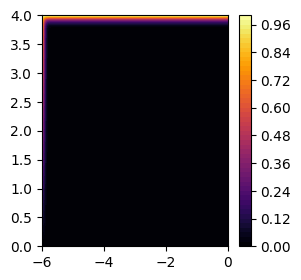

"\nplt.figure(figsize=(10,10))\nplt.pcolormesh(X, Y, psiArray, cmap='viridis')\nplt.colorbar()\nplt.show()\n"

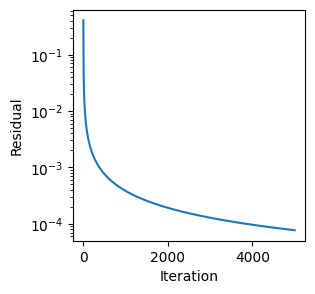

In [88]:
figureSizes = (3,3)

plt.figure(figsize=figureSizes)
plt.contourf(X, Y, psiArrayNew, levels = 50, cmap='inferno')
plt.colorbar()
plt.show()

plt.figure(figsize=figureSizes)
plt.semilogy(iterations, residuals)
plt.xlabel("Iteration")
plt.ylabel("Residual")



'''
plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, psiArray, cmap='viridis')
plt.colorbar()
plt.show()
'''




In [89]:
import numpy as np
tStart = time.perf_counter()

def generatedomain(x0, xN, nx, y0, yN, ny):
    x = np.linspace(x0, xN, nx)
    y = np.linspace(y0, yN, ny)
    X, Y = np.meshgrid(x, y)
    return X, Y

def applyDirichletBoundaryConditions(psi, X, Y):
   psi[:,0] = Y[:,0]/4
   psi[-1:,:] = 1
   psi[0,:] = 0
   psi[0:2001, 5000:6001] = 0
   return psi



def solverSOR(psiArray, omegaSOR, convergenceTolerance, numIterations):
    residuals = []
    counter = []
    for i in range(numIterations):
        psiInitial = psiArray.copy()

        #psiArray[1:-1, 1:-1] = ((1 - omegaSOR) * psiInitial[1:-1, 1:-1]) + (omegaSOR * (psiInitial[2:, 1:-1] + psiInitial[:-2, 1:-1] + psiInitial[1:-1, 2:] + psiInitial[1:-1, :-2]) / 4)

        #white
        psiArray[1:-1:2, 1:-1:2] = (1 - omegaSOR) * psiInitial[1:-1:2, 1:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[1:-1:2, 2::2] + psiArray[1:-1:2, :-2:2] +
                                               psiArray[2::2, 1:-1:2] + psiArray[:-2:2, 1:-1:2])

        psiArray[2:-1:2, 2:-1:2] = (1 - omegaSOR) * psiInitial[2:-1:2, 2:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[2:-1:2, 3::2] + psiArray[2:-1:2, 1:-2:2] +
                                               psiArray[3::2, 2:-1:2] + psiArray[1:-2:2, 2:-1:2])

        #black
        psiArray[1:-1:2, 2:-1:2] = (1 - omegaSOR) * psiInitial[1:-1:2, 2:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[1:-1:2, 3::2] + psiArray[1:-1:2, 1:-2:2] +
                                               psiArray[2::2, 2:-1:2] + psiArray[:-2:2, 2:-1:2])

        psiArray[2:-1:2, 1:-1:2] = (1 - omegaSOR) * psiInitial[2:-1:2, 1:-1:2] + \
                              (omegaSOR / 4.0) * (psiArray[2:-1:2, 2::2] + psiArray[2:-1:2, :-2:2] +
                                               psiArray[3::2, 1:-1:2] + psiArray[1:-2:2, 1:-1:2])

        psiArray[0:2001, 5000:6001] = 0
        psiArray[2001:-1, -1] = psiArray[2001:-1, -2]

        residual = np.sqrt(np.sum((psiArray - psiInitial)**2))/np.sqrt(np.sum((psiInitial)**2))
        residuals.append(residual)
        counter.append(i)

        if i % 200 == 0:
            print(f"Iteration: {i}, Residual: {residual:.8f}, Time elapsed: {time.perf_counter() - tStart:.3f} s")

        if residual < convergenceTolerance:
            print(f"\nConvergence reached after {i + 1} iterations.")
            break

    return psiArray, residuals, counter


#Main Code

x0, xN, nx =  -6, 0, 6001
y0, yN, ny = 0, 4, 4001
X, Y = generatedomain(x0, xN, nx, y0, yN, ny)

#make an array of zeros for the potential flow solution
psiArray = np.zeros_like(X)
psiArray = applyDirichletBoundaryConditions(psiArray, X, Y)

omegaSOR = 1.2
convergenceTolerance = 1e-5
numIterations = 5000

psiArrayNew, residuals, iterations = solverSOR(psiArray, omegaSOR, convergenceTolerance, numIterations)


tElapsed = time.perf_counter() - tStart
print(f"Elapsed time (imports -> pre-plot): {tElapsed:.3f} s")


Iteration: 0, Residual: 0.40528156, Time elapsed: 1.131 s
Iteration: 200, Residual: 0.00188183, Time elapsed: 181.326 s
Iteration: 400, Residual: 0.00094978, Time elapsed: 357.242 s
Iteration: 600, Residual: 0.00063580, Time elapsed: 530.588 s
Iteration: 800, Residual: 0.00047801, Time elapsed: 706.239 s
Iteration: 1000, Residual: 0.00038304, Time elapsed: 875.854 s
Iteration: 1200, Residual: 0.00031959, Time elapsed: 1048.811 s
Iteration: 1400, Residual: 0.00027419, Time elapsed: 1209.486 s
Iteration: 1600, Residual: 0.00024010, Time elapsed: 1376.978 s
Iteration: 1800, Residual: 0.00021355, Time elapsed: 1556.259 s
Iteration: 2000, Residual: 0.00019230, Time elapsed: 1733.168 s
Iteration: 2200, Residual: 0.00017490, Time elapsed: 1913.555 s
Iteration: 2400, Residual: 0.00016038, Time elapsed: 2087.445 s
Iteration: 2600, Residual: 0.00014810, Time elapsed: 2262.304 s
Iteration: 2800, Residual: 0.00013756, Time elapsed: 2438.441 s
Iteration: 3000, Residual: 0.00012842, Time elapsed: 26

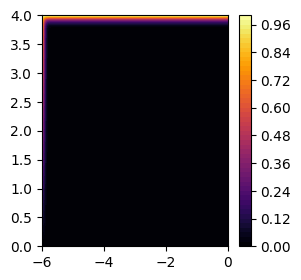

"\nplt.figure(figsize=(10,10))\nplt.pcolormesh(X, Y, psiArray, cmap='viridis')\nplt.colorbar()\nplt.show()\n"

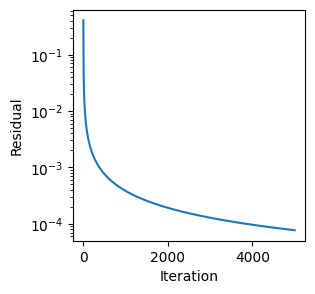

In [90]:
figureSizes = (3,3)

plt.figure(figsize=figureSizes)
plt.contourf(X, Y, psiArrayNew, levels = 50, cmap='inferno')
plt.colorbar()
plt.show()

plt.figure(figsize=figureSizes)
plt.semilogy(iterations, residuals)
plt.xlabel("Iteration")
plt.ylabel("Residual")



'''
plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, psiArray, cmap='viridis')
plt.colorbar()
plt.show()
'''




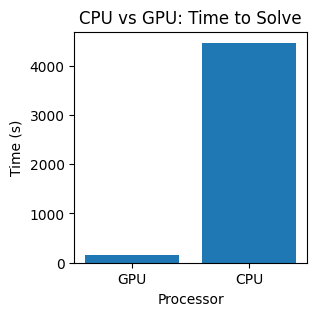

In [92]:
times = [164.006, 4469.189]
processor = ['GPU', 'CPU']
plt.figure(figsize=figureSizes)
plt.bar(processor, times)
plt.title("CPU vs GPU: Time to Solve")
plt.ylabel("Time (s)")
plt.xlabel("Processor")
#plt.xticks(rotation=45)
plt.show()